In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

In [22]:
# import csvs
readCrime = pd.read_csv('crimedata2.csv')
readCounty = pd.read_csv('NumberUnemployed.csv')
secondCrime = pd.read_csv('CrimeData.csv')
unemployment = pd.read_csv('PercentUnemployed.csv')
laborForce = pd.read_csv('TotalEmployment.csv')

In [23]:
# Convert county names to lower case
readCrime['county'] = readCrime['county'].str.lower()
secondCrime['county'] = secondCrime['county'].str.lower()
readCounty['county'] = readCounty['county'].str.lower()
laborForce['county'] = laborForce['county'].str.lower()
unemployment['county'] = unemployment['county'].str.lower()

# Remove space and county from county list
readCounty['county'] = readCounty['county'].str.replace(" county", "")
laborForce['county'] = laborForce['county'].str.replace(" county", "")
unemployment['county'] = unemployment['county'].str.replace(" county", "")

# Add two crime dataframes together and reset index
combCrime = readCrime.append(secondCrime)
combCrime.reset_index(inplace=True)

# Merge county dataframes with county dataframe, percents with that, and population with that
mergedDF = pd.merge(readCounty, combCrime, on=['state','county','Year'], how='inner')
percentDF = pd.merge(mergedDF, unemployment, on=['state','county','Year'])

# Grab only columns we want
finalDF = pd.merge(percentDF, laborForce, on=['state','county','Year'])

# Make Pretty
selectColumnsDF = finalDF[['Year', 'state', 'county', 'Average (Monthly) Number Unemployed', 
                         'Average (Monthly) Percent Unemployed', 'count', 'Average Total Employment']]
formattedDF = selectColumnsDF.rename(columns={'state': 'State', 'county': 'County', 
                            'Average (Monthly) Number Unemployed': 'Average Number Unemployed',
                           'Average (Monthly) Percent Unemployed': 'Average Percent Unemployed',
                           'count': 'Number of Crimes', 'Average Total Employment': 'Total Labor Force'})

# Show
formattedDF.head()

,Year,State,County,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force
0,2010,AL,lee,6005.750000,9.025000,7107,66764.16667
1,2011,AL,lee,5503.583333,8.050000,9148,68315.50000
2,2012,AL,lee,4671.250000,6.766667,8036,68918.25000
3,2013,AL,lee,4144.250000,5.858333,7441,70523.00000
4,2014,AL,lee,3987.000000,5.566667,7671,71372.16667


In [24]:
formattedDF.to_csv("EmploymentVsCrime.csv")

In [25]:
formattedDF['Crimes Per 100 Workers'] = (formattedDF['Number of Crimes'] / formattedDF['Total Labor Force'])*100
formattedDF.head()

,Year,State,County,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force,Crimes Per 100 Workers
0,2010,AL,lee,6005.750000,9.025000,7107,66764.16667,10.644932
1,2011,AL,lee,5503.583333,8.050000,9148,68315.50000,13.390812
2,2012,AL,lee,4671.250000,6.766667,8036,68918.25000,11.660192
3,2013,AL,lee,4144.250000,5.858333,7441,70523.00000,10.551168
4,2014,AL,lee,3987.000000,5.566667,7671,71372.16667,10.747887


In [26]:
formattedDF.describe()

,Year,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force,Crimes Per 100 Workers
count,17244.000000,17244.000000,17244.000000,17244.000000,1.724400e+04,17244.000000
mean,2012.500000,3714.109724,7.436269,5107.364417,4.897195e+04,8.225234
std,1.707875,14336.030408,3.001637,19626.383034,1.636862e+05,5.895747
min,2010.000000,3.750000,1.108333,0.000000,6.616667e+01,0.000000
25%,2011.000000,344.500000,5.191667,226.000000,4.940687e+03,3.987088
50%,2012.500000,878.041667,7.070833,914.000000,1.140600e+04,7.180384
75%,2014.000000,2361.125000,9.258333,3079.000000,3.100508e+04,11.398183
max,2015.000000,615100.666700,28.850000,583109.000000,5.004087e+06,147.560641


In [27]:
year2010DF = formattedDF[formattedDF['Year']==2010]
year2011DF = formattedDF[formattedDF['Year']==2011]
year2012DF = formattedDF[formattedDF['Year']==2012]
year2013DF = formattedDF[formattedDF['Year']==2013]
year2014DF = formattedDF[formattedDF['Year']==2014]
year2015DF = formattedDF[formattedDF['Year']==2015]

Slope = 0.6064700355909454
R Value = 0.3320424473316625
P Value = 6.27647505810412e-75


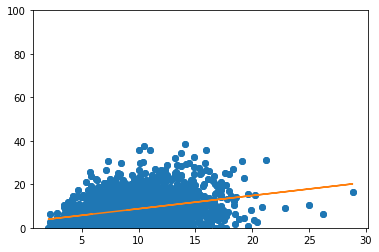

In [28]:
plt.scatter(year2010DF['Average Percent Unemployed'], year2010DF['Crimes Per 100 Workers'])
x = year2010DF['Average Percent Unemployed']
y = year2010DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept

plt.plot(x,y,'o', x, line)
plt.ylim(0,100)
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")

Slope = 0.7403984795830282
R Value = 0.37750956685543813
P Value = 5.1213866132828935e-98


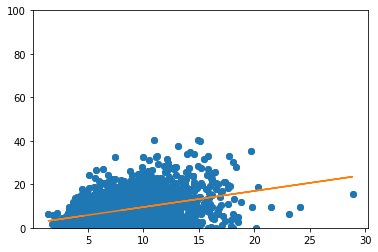

In [29]:
plt.scatter(year2011DF['Average Percent Unemployed'], year2011DF['Crimes Per 100 Workers'])
x2 = year2011DF['Average Percent Unemployed']
y2 = year2011DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x2,y2)
line2 = slope*x2+intercept

plt.plot(x2,y2,'o', x2, line2)
plt.ylim(0,100)
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")

Slope = 0.7385440629885409
R Value = 0.35187436248489085
P Value = 1.557918763945471e-84


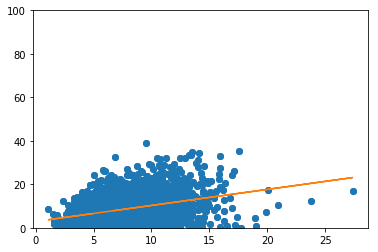

In [30]:
plt.scatter(year2012DF['Average Percent Unemployed'], year2012DF['Crimes Per 100 Workers'])
x3 = year2012DF['Average Percent Unemployed']
y3 = year2012DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x3,y3)
line3 = slope*x3+intercept

plt.plot(x3,y3,'o', x3, line3)
plt.ylim(0,100)
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")

Slope = 0.6177716021936553
R Value = 0.2850124518317378
P Value = 7.582337529151424e-55


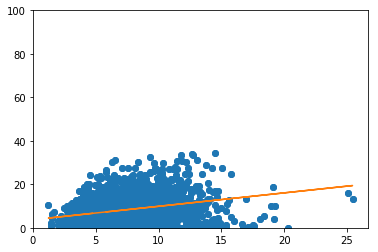

In [31]:
plt.scatter(year2013DF['Average Percent Unemployed'], year2013DF['Crimes Per 100 Workers'])
x3 = year2013DF['Average Percent Unemployed']
y3 = year2013DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x3,y3)
line3 = slope*x3+intercept

plt.plot(x3,y3,'o', x3, line3)
plt.ylim(0,100)
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")

Slope = 0.7436763424762048
R Value = 0.28446793275492044
P Value = 1.2333260286598283e-54


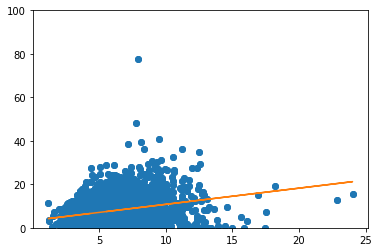

In [32]:
plt.scatter(year2014DF['Average Percent Unemployed'], year2014DF['Crimes Per 100 Workers'])
x4 = year2014DF['Average Percent Unemployed']
y4 = year2014DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x4,y4)
line4 = slope*x4+intercept

plt.plot(x4,y4,'o', x4, line4)
plt.ylim(0,100)
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")

Slope = 0.7775635564513047
R Value = 0.2524658986760794
P Value = 4.947563660319415e-43


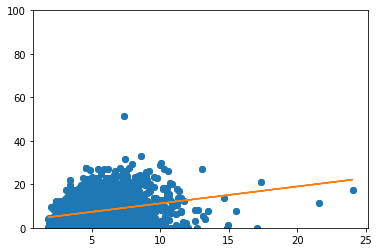

In [33]:
plt.scatter(year2015DF['Average Percent Unemployed'], year2015DF['Crimes Per 100 Workers'])
x5 = year2015DF['Average Percent Unemployed']
y5 = year2015DF['Crimes Per 100 Workers']
slope, intercept, r_value, p_value, std_err = stats.linregress(x5,y5)
line5 = slope*x5+intercept

plt.plot(x5,y5,'o', x5, line5)
plt.ylim(0,100)
print(f"Slope = {slope}")
print(f"R Value = {r_value}")
print(f"P Value = {p_value}")

In [34]:
year2010DF['Crimes Per Worker'] = year2010DF['Number of Crimes'] / year2010DF['Total Labor Force']
year2011DF['Crimes Per Worker'] = year2011DF['Number of Crimes'] / year2011DF['Total Labor Force']
year2012DF['Crimes Per Worker'] = year2012DF['Number of Crimes'] / year2012DF['Total Labor Force']
year2013DF['Crimes Per Worker'] = year2013DF['Number of Crimes'] / year2013DF['Total Labor Force']
year2014DF['Crimes Per Worker'] = year2014DF['Number of Crimes'] / year2014DF['Total Labor Force']
year2015DF['Crimes Per Worker'] = year2015DF['Number of Crimes'] / year2015DF['Total Labor Force']
year2010DF.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Year,State,County,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force,Crimes Per 100 Workers,Crimes Per Worker
0,2010,AL,lee,6005.750000,9.025000,7107,66764.166670,10.644932,0.106449
6,2010,AL,bibb,1020.416667,11.425000,658,8934.000000,7.365122,0.073651
12,2010,AL,clay,845.916667,14.466667,208,5851.000000,3.554948,0.035549
18,2010,AL,dale,1947.750000,8.833333,2160,22071.250000,9.786487,0.097865
24,2010,AL,hale,971.666667,15.091667,362,6445.083333,5.616685,0.056167


In [35]:
top2010 = year2010DF.nlargest(10,'Crimes Per Worker')
top2011 = year2011DF.nlargest(10,'Crimes Per Worker')
top2012 = year2012DF.nlargest(10,'Crimes Per Worker')
top2013 = year2013DF.nlargest(10,'Crimes Per Worker')
top2014 = year2014DF.nlargest(10,'Crimes Per Worker')
top2015 = year2015DF.nlargest(10,'Crimes Per Worker')
top2015

,Year,State,County,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force,Crimes Per 100 Workers,Crimes Per Worker
10937,2015,NM,hidalgo,131.500000,6.191667,3138,2126.583333,147.560641,1.475606
2453,2015,GA,murray,1182.833333,7.358333,8250,16069.583330,51.339228,0.513392
13145,2015,SC,dillon,1090.500000,8.591667,4160,12673.583330,32.824182,0.328242
2867,2015,GA,muscogee,5883.500000,7.450000,24973,78897.916670,31.652293,0.316523
13265,2015,SC,marlboro,968.583333,10.041667,2862,9646.666667,29.668279,0.296683
9647,2015,NC,richmond,1339.750000,7.916667,4970,16926.083330,29.362965,0.293630
13157,2015,SC,marion,1281.500000,9.966667,3701,12862.166670,28.774312,0.287743
779,2015,AR,jefferson,2025.166667,7.041667,7961,28769.583330,27.671586,0.276716
683,2015,AR,pulaski,8493.833333,4.575000,51233,186061.083300,27.535581,0.275356
2933,2015,GA,dougherty,2921.416667,7.725000,10397,37879.083330,27.447866,0.274479


In [36]:
top2010Unem = year2010DF.nlargest(10,'Average Percent Unemployed')
top2011Unem = year2011DF.nlargest(10,'Average Percent Unemployed')
top2012Unem = year2012DF.nlargest(10,'Average Percent Unemployed')
top2013Unem = year2013DF.nlargest(10,'Average Percent Unemployed')
top2014Unem = year2014DF.nlargest(10,'Average Percent Unemployed')
top2015Unem = year2015DF.nlargest(10,'Average Percent Unemployed')
top2015Unem

,Year,State,County,Average Number Unemployed,Average Percent Unemployed,Number of Crimes,Total Labor Force,Crimes Per 100 Workers,Crimes Per Worker
1139,2015,CA,imperial,18811.166670,24.050000,13595,78162.083330,17.393344,0.173933
857,2015,AZ,yuma,20184.333330,21.583333,10756,93222.666670,11.537966,0.115380
10847,2015,NM,luna,1901.000000,17.341667,2303,10992.583330,20.950489,0.209505
8753,2015,MS,issaquena,71.583333,17.075000,0,418.916667,0.000000,0.000000
1019,2015,CA,colusa,1702.750000,15.508333,850,11069.916670,7.678468,0.076785
6263,2015,KY,magoffin,524.250000,14.933333,52,3508.750000,1.482009,0.014820
8759,2015,MS,jefferson,339.333333,14.875000,0,2277.583333,0.000000,0.000000
173,2015,AL,wilcox,414.083333,14.650000,392,2824.250000,13.879791,0.138798
14135,2015,TX,starr,3479.000000,13.466667,1959,25855.333330,7.576773,0.075768
869,2015,AZ,apache,2722.166667,13.250000,846,20517.833330,4.123242,0.041232


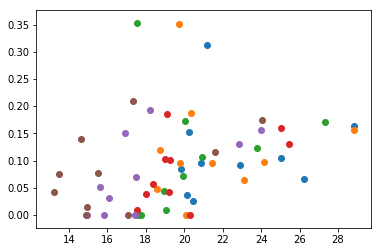

In [37]:
plt.scatter(top2010Unem['Average Percent Unemployed'], top2010Unem['Crimes Per Worker'])
plt.scatter(top2011Unem['Average Percent Unemployed'], top2011Unem['Crimes Per Worker'])
plt.scatter(top2012Unem['Average Percent Unemployed'], top2012Unem['Crimes Per Worker'])
plt.scatter(top2013Unem['Average Percent Unemployed'], top2013Unem['Crimes Per Worker'])
plt.scatter(top2014Unem['Average Percent Unemployed'], top2014Unem['Crimes Per Worker'])
plt.scatter(top2015Unem['Average Percent Unemployed'], top2015Unem['Crimes Per Worker'])

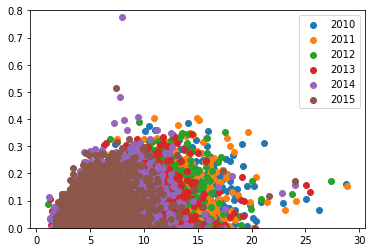

In [38]:
plt.scatter(year2010DF['Average Percent Unemployed'], year2010DF['Crimes Per Worker'])
plt.scatter(year2011DF['Average Percent Unemployed'], year2011DF['Crimes Per Worker'])
plt.scatter(year2012DF['Average Percent Unemployed'], year2012DF['Crimes Per Worker'])
plt.scatter(year2013DF['Average Percent Unemployed'], year2013DF['Crimes Per Worker'])
plt.scatter(year2014DF['Average Percent Unemployed'], year2014DF['Crimes Per Worker'])
plt.scatter(year2015DF['Average Percent Unemployed'], year2015DF['Crimes Per Worker'])
plt.ylim(0,.8)
plt.legend([2010,2011,2012,2013,2014,2015])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1b989f98>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1b998898>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1b989e48>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1b66c128>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1b66c550>,
 'means': []}

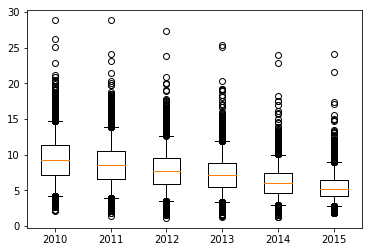

In [39]:
plt.boxplot([year2010DF['Average Percent Unemployed'], year2011DF['Average Percent Unemployed'],
            year2012DF['Average Percent Unemployed'], year2013DF['Average Percent Unemployed'],
            year2014DF['Average Percent Unemployed'], year2015DF['Average Percent Unemployed']]
            , vert = True, whis = [5,95], labels=[2010, 2011, 2012, 2013, 2014, 2015])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1b415240>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1b415b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1b4150f0>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1b41a390>,
 'fliers': [],
 'means': []}

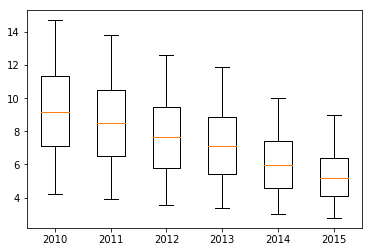

In [40]:
plt.boxplot([year2010DF['Average Percent Unemployed'], year2011DF['Average Percent Unemployed'],
            year2012DF['Average Percent Unemployed'], year2013DF['Average Percent Unemployed'],
            year2014DF['Average Percent Unemployed'], year2015DF['Average Percent Unemployed']]
            , vert = True, whis = [5,95], labels=[2010, 2011, 2012, 2013, 2014, 2015], showfliers = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c6613c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c661c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c661278>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1c665518>,
 'fliers': [],
 'means': []}

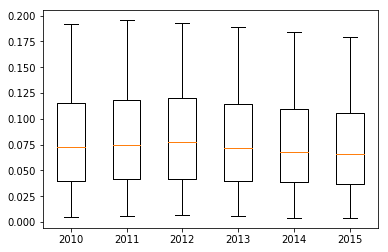

In [41]:
plt.boxplot([year2010DF['Crimes Per Worker'], year2011DF['Crimes Per Worker'],
            year2012DF['Crimes Per Worker'], year2013DF['Crimes Per Worker'],
            year2014DF['Crimes Per Worker'], year2015DF['Crimes Per Worker']]
            , vert = True, whis = [5,95], labels=[2010, 2011, 2012, 2013, 2014, 2015], 
           showfliers = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c6b3390>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c6b3c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c6b3240>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1c6ba4e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c6ba908>,
 'means': []}

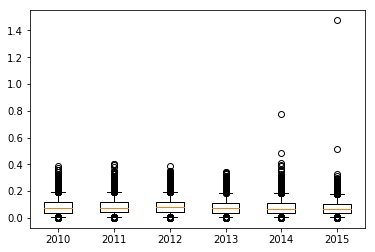

In [42]:
plt.boxplot([year2010DF['Crimes Per Worker'], year2011DF['Crimes Per Worker'],
            year2012DF['Crimes Per Worker'], year2013DF['Crimes Per Worker'],
            year2014DF['Crimes Per Worker'], year2015DF['Crimes Per Worker']]
            , vert = True, whis = [5,95], labels=[2010, 2011, 2012, 2013, 2014, 2015])

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


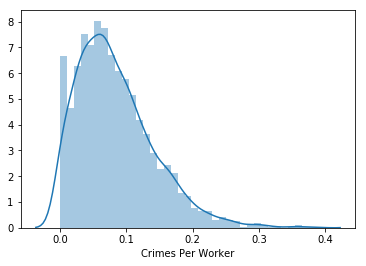

In [43]:
sns.distplot(year2010DF['Crimes Per Worker'])

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


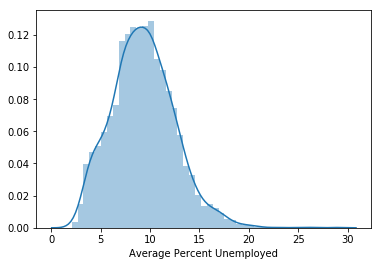

In [44]:
sns.distplot(year2010DF['Average Percent Unemployed'])

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


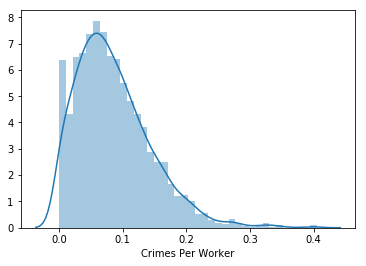

In [45]:
sns.distplot(year2011DF['Crimes Per Worker'])

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


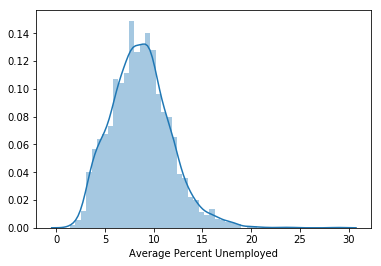

In [46]:
sns.distplot(year2011DF['Average Percent Unemployed'])

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


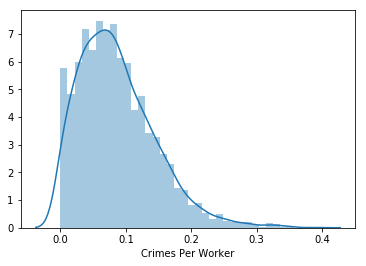

In [47]:
sns.distplot(year2012DF['Crimes Per Worker'])

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


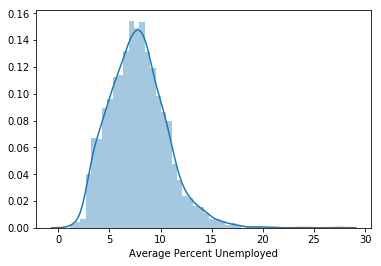

In [48]:
sns.distplot(year2012DF['Average Percent Unemployed'])

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


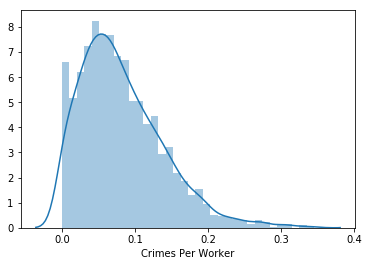

In [49]:
sns.distplot(year2013DF['Crimes Per Worker'])

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


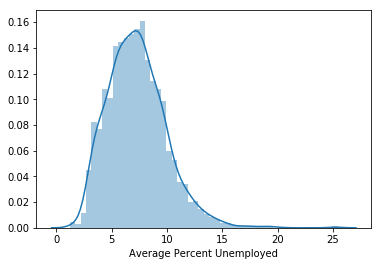

In [50]:
sns.distplot(year2013DF['Average Percent Unemployed'])

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


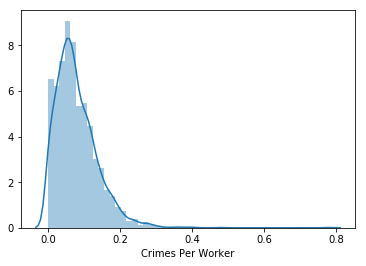

In [51]:
sns.distplot(year2014DF['Crimes Per Worker'])

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


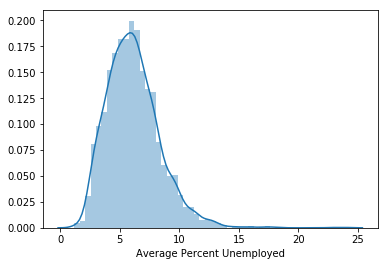

In [52]:
sns.distplot(year2014DF['Average Percent Unemployed'])

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


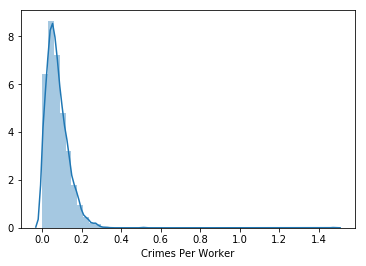

In [53]:
sns.distplot(year2015DF['Crimes Per Worker'])

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


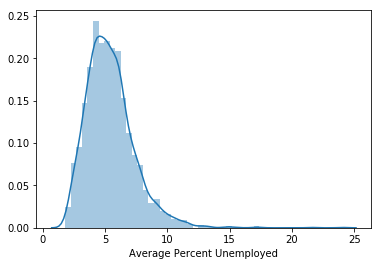

In [54]:
sns.distplot(year2015DF['Average Percent Unemployed'])